In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
sns.set_theme(context='notebook',style='darkgrid')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('created_datasets/used_car_dataset.csv')
df.sample(7)

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
6483,Tata,Safari,2011,13,"85,000 km",Manual,first,Diesel,Nov-24,Tata Safari 2011 Diesel Good Condition,"₹ 2,60,000"
3853,Volvo,S90,2017,7,"60,000 km",Automatic,first,Diesel,Nov-24,"Volvo S90 D4 Inscription, 2017, Diesel","₹ 32,00,000"
1341,BMW,X1,2012,12,"134,000 km",Automatic,second,Diesel,Nov-24,"BMW X1 2012-2015 sDrive20d, 2012, Diesel","₹ 7,49,000"
163,Hyundai,i20,2015,9,85000.0 km,Manual,second,Diesel,Nov-24,"Hyundai i20 Sportz Plus Diesel, 2015, Diesel","₹ 5,60,000"
7080,Maruti Suzuki,Omni,2009,15,"65,000 km",Manual,second,Hybrid/CNG,Nov-24,Maruti Suzuki Omni 2009,"₹ 60,000"
7331,Maruti Suzuki,Omni,2010,14,"100,000 km",Manual,second,Hybrid/CNG,Nov-24,Maruti Suzuki Omni 2010 CNG & Hybrids Good Con...,"₹ 1,10,000"
7815,Toyota,Innova Crysta,2021,3,"24,000 km",Automatic,first,Diesel,Nov-24,"Toyota Innova Crysta 2.4 Z 7 STR, 2021, Diesel","₹ 31,50,000"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


#### `KmDriven` column contains 47 empty values

In [4]:
df = df.dropna(subset='kmDriven').reset_index(drop=True)

In [5]:
df.describe()

,Year,Age
count,9535.000000,9535.000000
mean,2016.375669,7.624331
std,4.071090,4.071090
min,1986.000000,0.000000
25%,2014.000000,5.000000
50%,2017.000000,7.000000
75%,2019.000000,10.000000
max,2024.000000,38.000000


### Feature Engineering/Extraction

In [6]:
df['model'] = df['model'].str.lower()

In [7]:
df['kmDriven'] = df['kmDriven'].str.replace('km','').str.replace(',','').str.strip().apply(lambda x: int(float(x)))
df['AskPrice'] = df['AskPrice'].str.replace(',','').str.replace('₹','').str.strip().apply(lambda x: int(x))

In [8]:
total_companies = df['Brand'].nunique()
top_10_car_companies = df['Brand'].value_counts().head(10).index.tolist()
top_10_df = df[df['Brand'].isin(top_10_car_companies)]

In [9]:
perc = df['Brand'].isin(top_10_car_companies).sum()/df.shape[0]*100

print(f'Out of {total_companies} campanies top 10 campies own {perc}% of the market')

Out of 38 campanies top 10 campies own 84.53067645516518% of the market


In [10]:
df[df['Brand'].isin(top_10_car_companies)].describe()

,Year,Age,kmDriven,AskPrice
count,8060.000000,8060.000000,8060.000000,8.060000e+03
mean,2016.238710,7.761290,71084.106203,9.802230e+05
std,4.117138,4.117138,55162.064299,1.422688e+06
min,1986.000000,0.000000,0.000000,1.500000e+04
25%,2014.000000,5.000000,45000.000000,3.600000e+05
50%,2017.000000,7.000000,65260.500000,5.850000e+05
75%,2019.000000,10.000000,86000.000000,1.027750e+06
max,2024.000000,38.000000,980002.000000,2.600000e+07


### Univariate Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9535 entries, 0 to 9534
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9535 non-null   object
 1   model         9535 non-null   object
 2   Year          9535 non-null   int64 
 3   Age           9535 non-null   int64 
 4   kmDriven      9535 non-null   int64 
 5   Transmission  9535 non-null   object
 6   Owner         9535 non-null   object
 7   FuelType      9535 non-null   object
 8   PostedDate    9535 non-null   object
 9   AdditionInfo  9535 non-null   object
 10  AskPrice      9535 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 819.5+ KB


<Axes: xlabel='Brand', ylabel='count'>

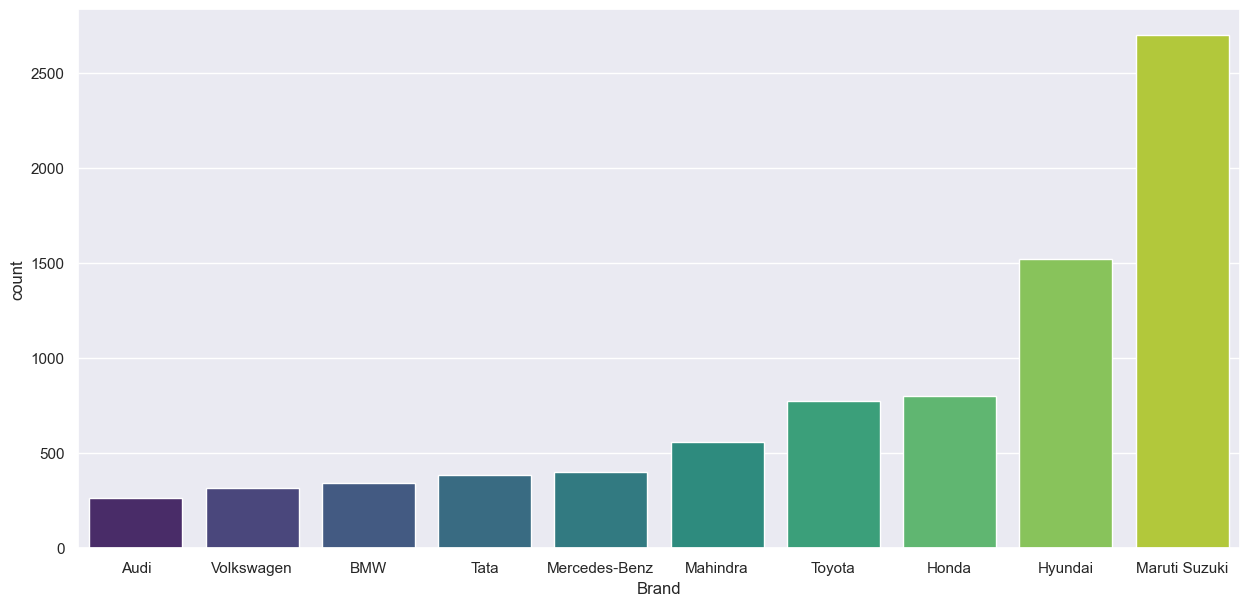

In [12]:
plt.figure(figsize=(15,7))
sns.countplot(data=top_10_df, x='Brand',palette='viridis',order=top_10_df['Brand'].value_counts(ascending=True).index)
# plt.xticks(rotation=45)

<Axes: title={'center': 'top 10 most selling cars in used car market'}, ylabel='model'>

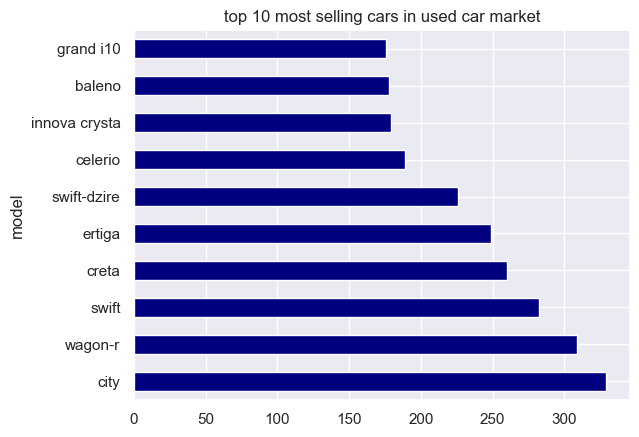

In [13]:
top_10_df['model'].value_counts().head(10).plot(kind='barh',title='top 10 most selling cars in used car market',colormap='jet')

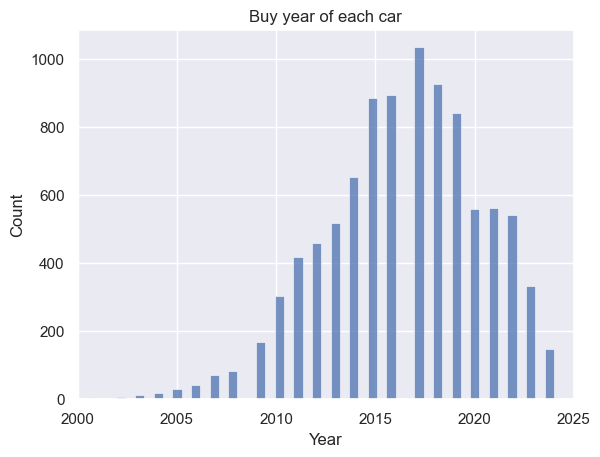

In [14]:
sns.histplot(data=df, x='Year')
plt.title('Buy year of each car')
_ = plt.xlim(2000,2025)

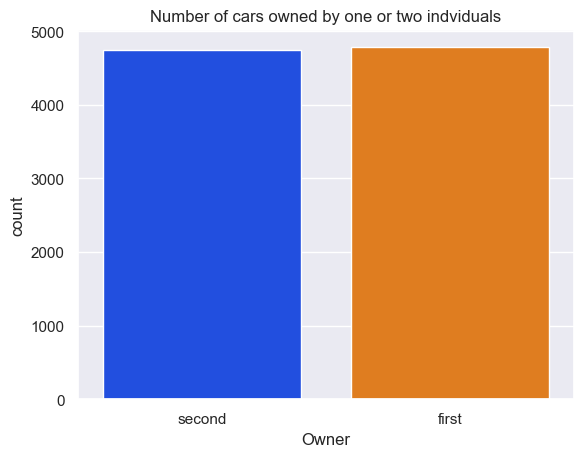

In [15]:
sns.countplot(data=df,x='Owner',palette='bright')
_ = plt.title('Number of cars owned by one or two indviduals')

##### Equal no. of owners show that the dataset has equal count of first and second owned cars

Text(0, 0.5, 'Count')

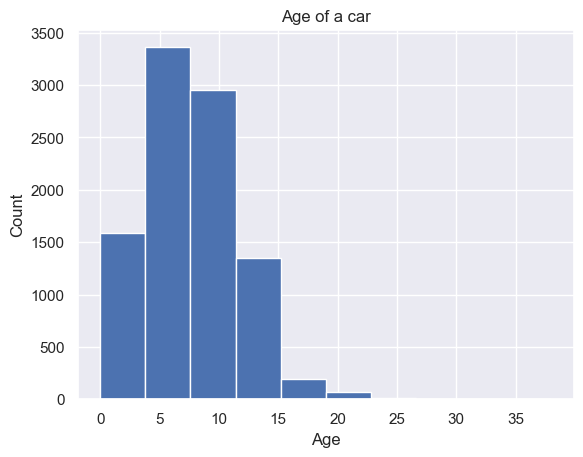

In [16]:
plt.hist(x=df['Age'])
plt.title('Age of a car')
plt.xlabel('Age')
plt.ylabel('Count')

<Axes: xlabel='Transmission', ylabel='count'>

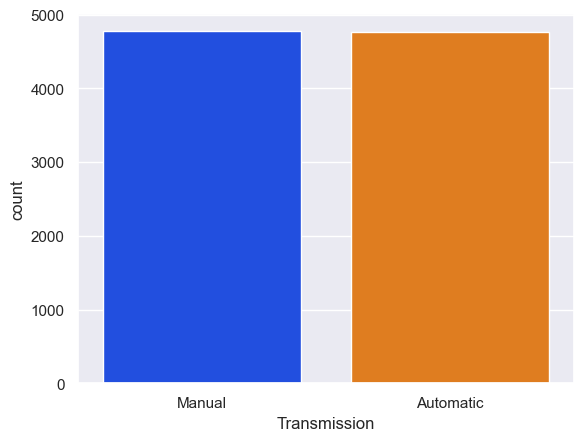

In [17]:
sns.countplot(data=df, x='Transmission',palette='bright')

<Axes: xlabel='FuelType', ylabel='count'>

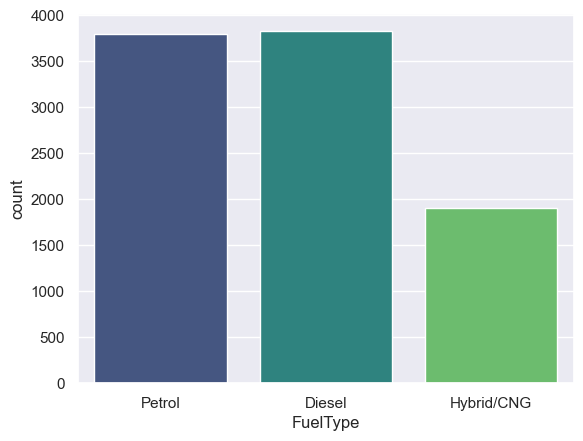

In [18]:
sns.countplot(data=df, x='FuelType',palette='viridis')

(10000.0, 3000000.0)

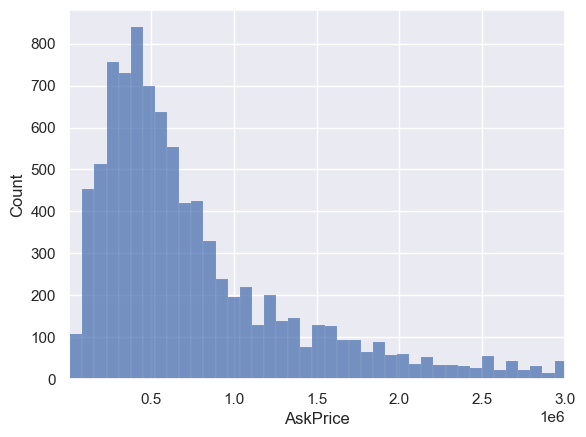

In [19]:
sns.histplot(df['AskPrice'])
plt.xlim(10000, 3000000)

### Insights from Univariate Analysis
#### **Numerical Features**
**`Age:`**  
- Most cars are relatively new, falling within the 5–10 years range.
- Very few cars exceed 20 years, suggesting that older cars are less commonly listed.

**`kmDriven:`**  
- The majority of cars have mileage below 100,000 km, with clusters around 50,000 km and 100,000 km.
- A small number of high-mileage outliers exceed 200,000 km, which might indicate commercial or heavily used vehicles.
- Many cars have driven less than 100 KM, it shows either the car is brand new which means that the owner is selling the car because of high demand to get good gains or the data is incorrect

**`AskPrice:`**  
- The price distribution is heavily right-skewed, with most cars priced at the lower end.
- A few high-end cars create outliers, possibly premium models or luxury brands.  

#### **Categorical Features** 

**`Brand:`**  
- Most of the used cars are of Maruti Suzuki Brands, this signifies that Maruti has a major contribution in new car market as well.
- Top 10 car comapanies (out of 38 comapanies) own 85% percent of the used car market. This shows that most of the car makers do not sell enough cars compares to some big manufacturers.

**`Transmission:`**  
- Manual transmissions dominate the dataset, indicating a preference or greater availability in the used car market.

**`Owner:`**
- The majority of cars are first-owner, with a smaller proportion being second or later owners, which is typical for used car markets.  

**`FuelType:`**
- Petrol cars are the most common, followed by Diesel cars.
- Alternative fuels like CNG or electric vehicles might have limited representation, indicating market trends or preferences.  

#### Potential Actions
**`Focus Areas:`**
- Investigate outliers in kmDriven and AskPrice to ensure data accuracy or identify premium vehicles.
- Explore the dominance of manual transmissions—check if it's linked to certain brands or regions.  

**`Pricing Trends:`**
- Analyze whether lower mileage correlates with higher asking prices.

## Bi-vairate Analysis

<Axes: xlabel='Owner', ylabel='Age'>

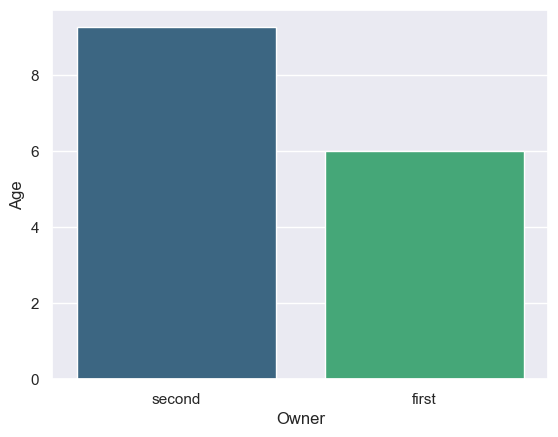

In [20]:
sns.barplot(data=df, x='Owner',y='Age',estimator='mean',errorbar=None,palette='viridis')

- The average age of cars having only one previous owner is significantly lower than the cars having two previous owners.

- This behaviour suggests that older cars are more probably have 2 owners compared to newer models.
___

<Axes: xlabel='Owner', ylabel='kmDriven'>

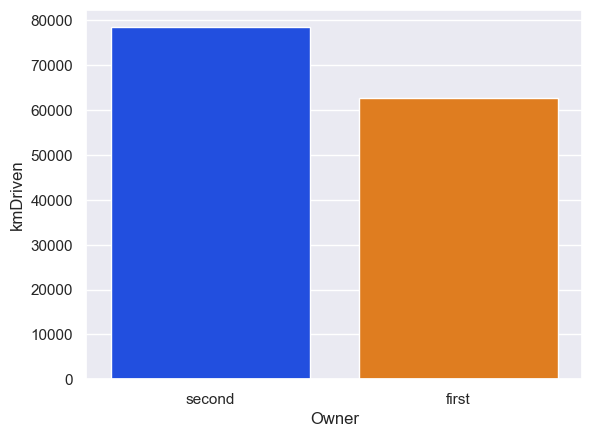

In [21]:
sns.barplot(data=df, x='Owner',y='kmDriven',estimator='mean',errorbar=None,palette='bright')

- Second owner cars are generally more driven on the roads than sigle owner cars.

- This is true as they are older therefore they have spent more time on the roads naturally.
____

<Axes: xlabel='Owner', ylabel='AskPrice'>

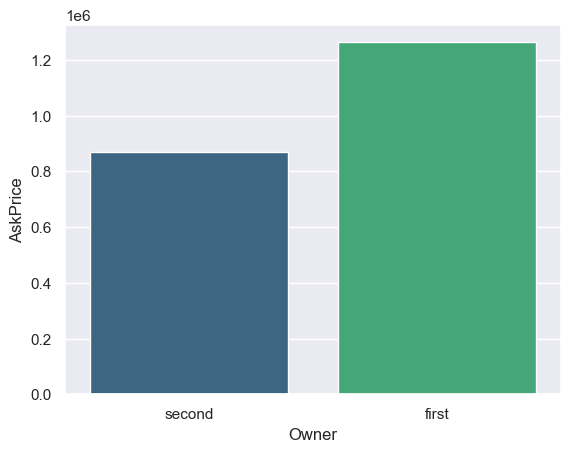

In [22]:
sns.barplot(data=df, x='Owner',y='AskPrice',estimator='mean',errorbar=None,palette='viridis')

- Average AskPrice of single owner cars (around 12 Lakhs) are considerably higher then other cars.
- This is well justified as single owner cars are generally newer as compared to other cars (discussed earlier), that is why their demanding price is also higher.

- Second reason could be the difference in number of kilometers travelled by second owner cars, they are driven more on road causing the asked price to become lower eventually.
___

<Axes: xlabel='FuelType', ylabel='Age'>

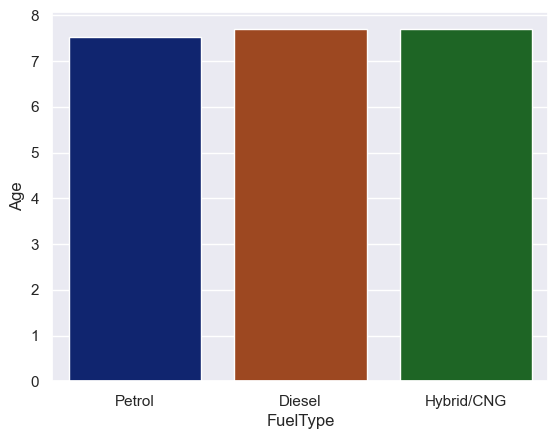

In [23]:
sns.barplot(data=df, x='FuelType',y='Age',estimator='mean',errorbar=None,palette='dark')

- Different Fueltype doesn't significantly impact on the age of the cars.
___

<Axes: xlabel='FuelType', ylabel='kmDriven'>

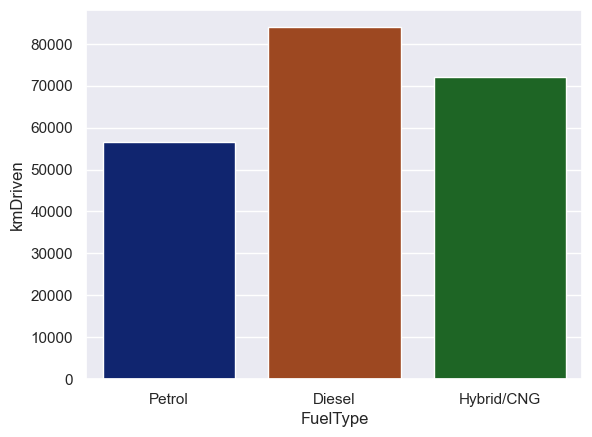

In [24]:
sns.barplot(data=df, x='FuelType',y='kmDriven',estimator='mean',errorbar=None,palette='dark')

##### Diesel cars are more driven on roads followed by Hybrid/CNG and petrol cars. This could be of following reasons
- Most of the diesel engines are in commercial cars which travels lot more distance (city to city and state to state) than a normal dosmetic cars
- Most of the CNG/Hybrids cars are preffered in taxi services which also travels frequently on daily basis causing the average distance travelled higher than petrol

- Petrol cars are mostly owned by normal people who doesn't travel for long distance often causing the least amount of distance travelled.
___

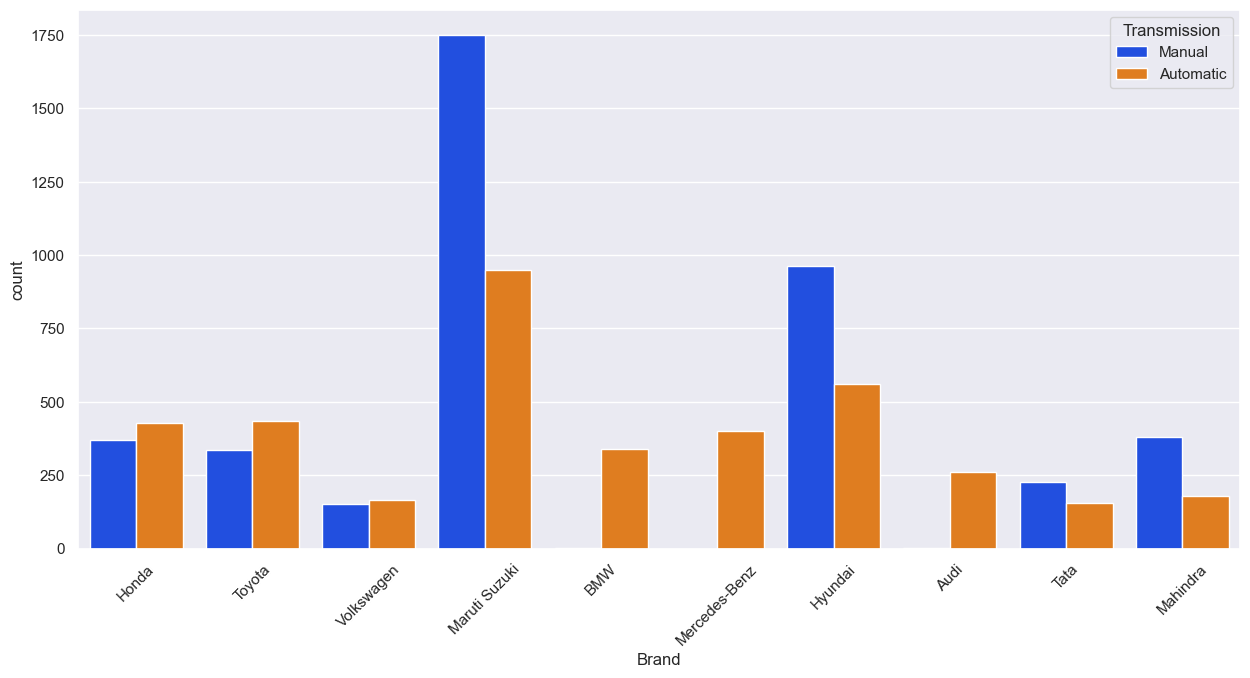

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(data=top_10_df, x='Brand', hue='Transmission',palette='bright')
_ = plt.xticks(rotation=45)

- Maruti comes at the top having maxium no. of cars in both manual and automatic transmission.
- This could be because the no. of cars maruti suzuki sells in new car industry.
- Luxury car brands like Mercedes, Audi and BMW seems to be focusing on Automatic transmission cars only.
- Most of the companies except the Europian ones offers more manual drive cars compared to their automatic counterpart. This tells us that Automatic transimission if favoured in europe.

- Indian local companies (TATA and MAHINDRA) also offers more manual car then automatics which shows a pattern of car buying choice among indian customers.
- While Japanesse brands (HONDA and TOYOTA) are showing their favour towards the automatic transmission just like europian manufactures, this suggest that indian consumers are leaning towards their Automatic transmissions more.

___

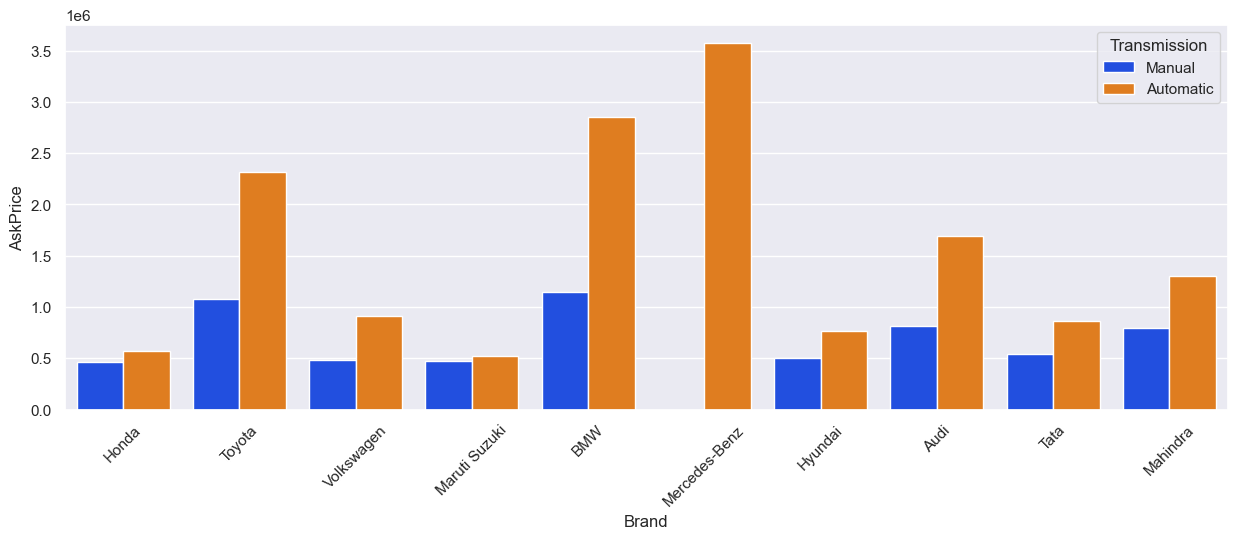

In [26]:
plt.figure(figsize=(15,5))
sns.barplot(data=top_10_df, x='Brand',y='AskPrice', estimator='mean',hue='Transmission',errorbar=None,palette='bright')
_ = plt.xticks(rotation=45)

- Automatic transmission are having higher AskPrice, which shows that it requires the car manufactured more hardware and technology to build cars with automatic transmission.
- Luxury europian brands ( Audi, BMW, Mercedes) charges quite high for their automatic transmission signifying their higher cost to manufactures a certain type.
- Volkswagen follows the story as other europians manufacturers.

- While Mass Market car brands like Maruti Suzuki, Hyundai, Honda, are offering both the transmission with lesser capital differentiables.
- Indian brands also offers both the transmission at a low price range difference.
- While Japanesse brands have different approach in their market price for different transmission variants, toyota charges almost double the price of their manual transmission, this could be because of certain models that only comes in automatic transmission and might have high buy price as well, further study is required to get the actual cause of this behaviour.
____

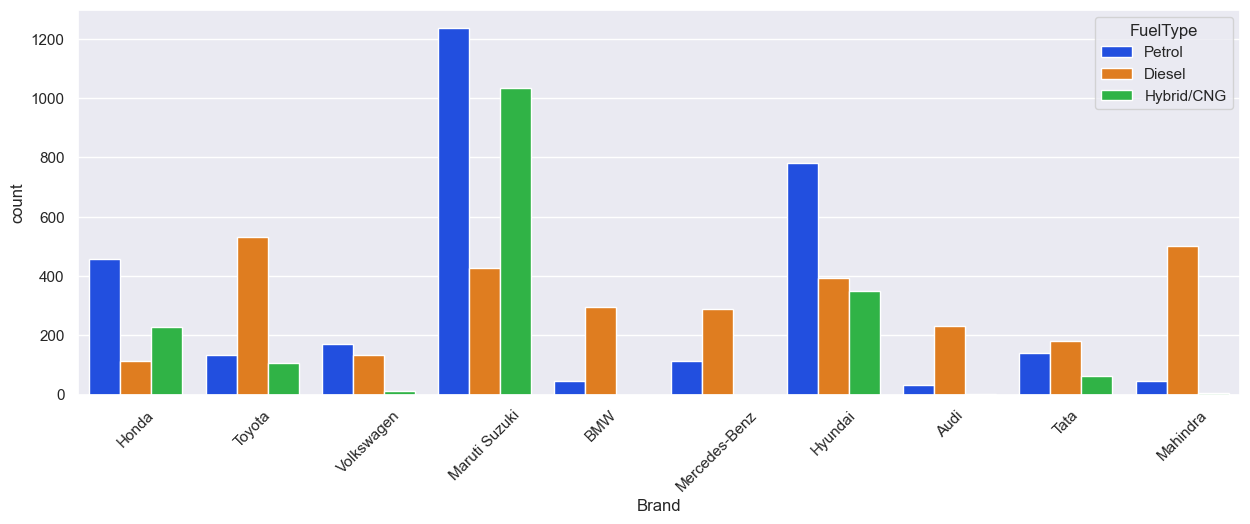

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(data=top_10_df, x='Brand', hue='FuelType',palette='bright')
_ = plt.xticks(rotation=45)

- Maruti Suzuki leads in no. of offerings in all the differnt fuel options provided to the end users.
- Luxury Brands (Audi, BMW, Mercedes) do not offer Hybrid/ CNG based cars which tells their interest in only manufacturing petrol and diesel engines only.

- No. of CNG cars available in used car market are less then petrol and diesel cars for every brand except maruti suzuki. This implies that Maruti Suzuki generally sells more CNG models then diesel models.
- out of top 10 most selling brands, only 5 are offering CNG models which are also mass market makers, this clearly defines that CNG/Hybrid cars are preffered in mass market cars which are lower in price.

___

<Axes: xlabel='Brand,Transmission'>

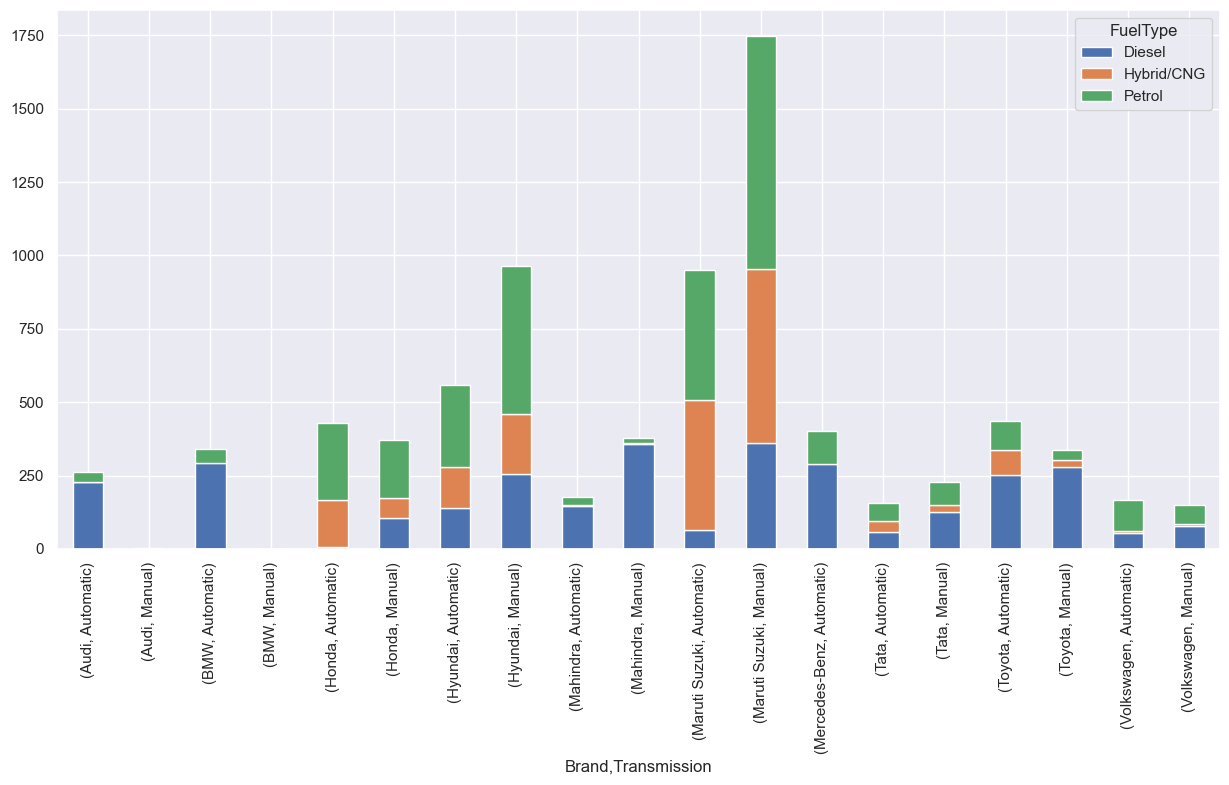

In [28]:
pd.crosstab(index=[top_10_df['Brand'],top_10_df['Transmission']],columns=top_10_df['FuelType']).plot(kind='bar',stacked=True,figsize=(15,7))

- Petrol cars (green bars) are the most common fuel type across most brands, especially for manual transmissions.
- Maruti Suzuki: Dominates the market with a significantly higher count of petrol cars, both manual and automatic.
- Diesel cars (blue bars) also have substantial representation, particularly for brands like Hyundai, Mahindra, and Toyota.
- Hybrid/CNG cars (orange bars) are comparatively fewer but are present across a variety of brands.


- Hyundai: Shows a balanced distribution between diesel and petrol cars, with fewer Hybrid/CNG options.
- Premium Brands (Audi, BMW, Mercedes-Benz): Diesel cars appear more common for these brands compared to petrol or Hybrid/CNG options.
- Manual transmissions are more prevalent across all brands, indicated by the larger bar heights for manual categories compared to automatic.
- Automatic transmission is gaining traction in some brands like Honda and Mercedes-Benz.
- Brands like Tata and Volkswagen have a more even distribution of fuel types compared to others like Maruti Suzuki and Mahindra, which are skewed towards petrol or diesel cars.
___

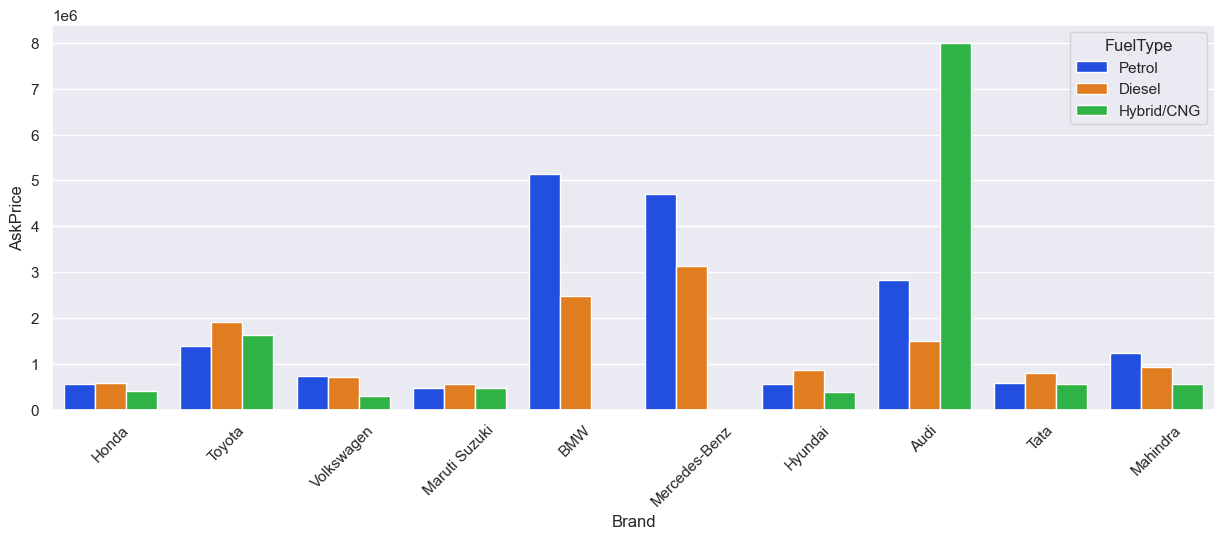

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(data=top_10_df, x='Brand',y='AskPrice', estimator='mean',hue='FuelType',errorbar=None,palette='bright')
_ = plt.xticks(rotation=45)

- Engine Cost for different fuel type are different amongst the manufacturers.
- Europian brands cost more on Petrol cars while other manufactures offer different versions either on same price range or slightly lesser than diesel.

- Meanwhile, CNG comes out to be cheaper than diesel engine cars, equivalent to the petrol versions.
- Hybrid/CNG version of Audi cars comes out to be exceptionally higher, this behaviour is abnormal and could be because of any outlier in the data.
___

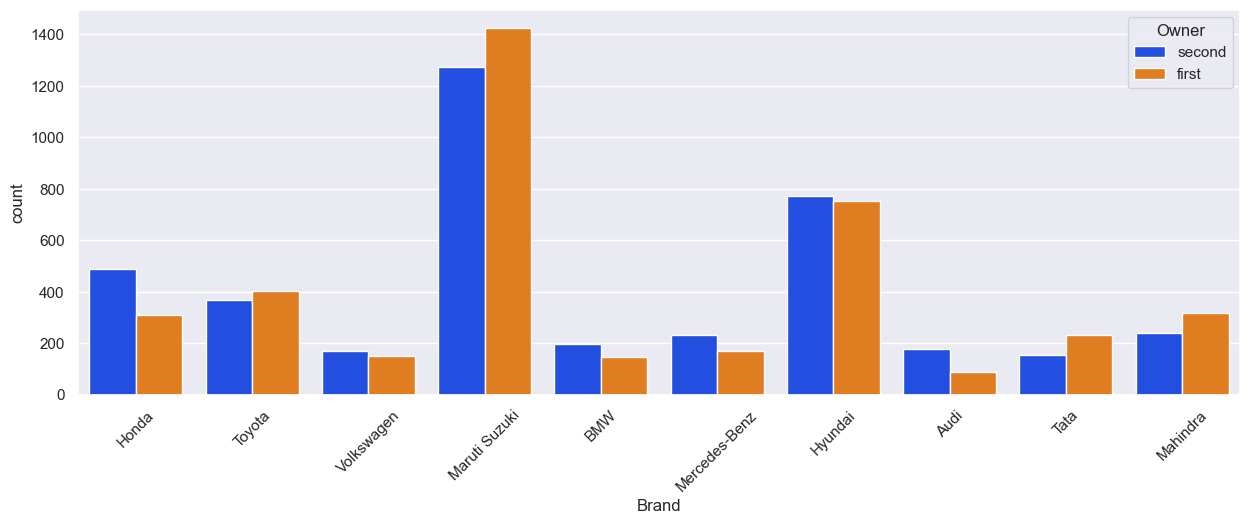

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(data=top_10_df, x='Brand', hue='Owner',palette='bright')
_ = plt.xticks(rotation=45)

- No. of previous owners of car varies significantly different for different car manufacturers.
- For europian car models, more cars have 2 owners which signifies either europians cars hold their resale values better than other manufacturers or these cars have higher demand or the customers are not satisfied with their cars.

- Indian market manufacturers like Maruti Suzuki, Tata, Mahindra have more single owner.
- While the remaining cars brands (Honda, Toyota, Hyundai) shows different results, more study is required for actual reasons.
___

<Axes: xlabel='Brand', ylabel='Age'>

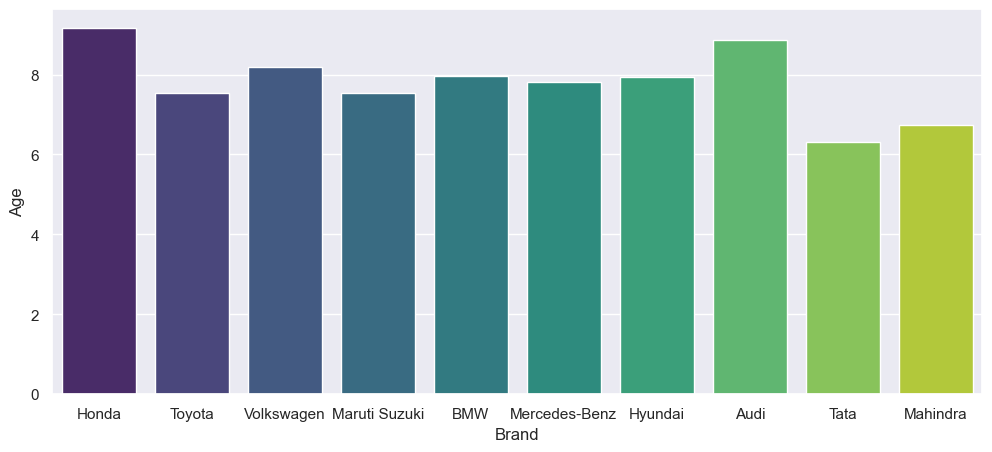

In [31]:
plt.figure(figsize=(12,5))
sns.barplot(data=top_10_df, x='Brand', y='Age', estimator='mean', errorbar=None,palette='viridis')

- Average age of used cars are around 8 years or more suggesting a normal car is either from year 2016 or later.
- Indian car brands has average age between 6 - 6.75 years indicating they are generally newer then the rest of the cars.

- Honda has shown the highest average age of their cars. This could be because of their good reliable cars.
___

<Axes: xlabel='KM Driven', ylabel='Brand'>

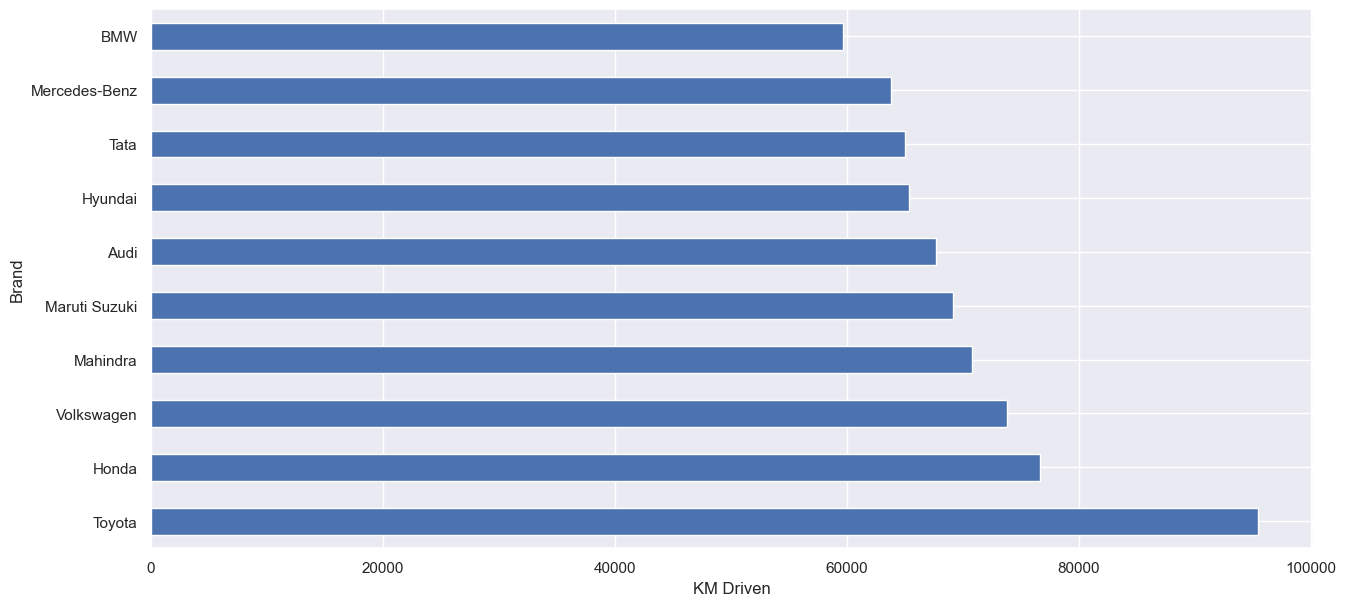

In [32]:
top_10_df.groupby('Brand')['kmDriven'].mean().sort_values(ascending=False).plot(kind='barh', figsize=(15,7),xlabel='KM Driven')

`Toyota Has the Highest Average Kilometers Driven:`
- Toyota cars have the highest average kilometers driven, significantly higher than other brands.

`Premium Brands Show Lower Average Kilometers:`
- Brands like BMW, Mercedes-Benz, and Audi exhibit relatively lower average kilometers driven compared to mainstream brands like Toyota, Maruti Suzuki, or Hyundai.

`Mainstream Brands Have Higher Usage:`
- Brands like Mahindra, Honda, Hyundai, and Volkswagen have moderate to high average kilometers driven, indicating significant use.

`Maruti Suzuki Shows Moderate KM Driven:`
- Despite being the most common brand in India, the average kilometers driven for Maruti Suzuki cars are moderate, likely due to a mix of urban usage and shorter commutes.
___

(0.0, 200000.0)

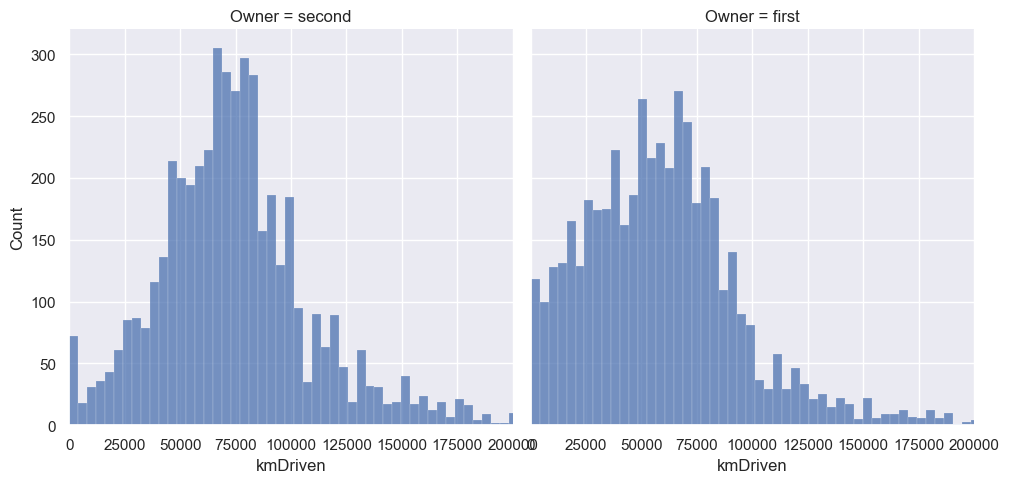

In [33]:
sns.displot(data=df, x='kmDriven',col='Owner')
plt.xlim(0,200000)

- Second Owner Cars Have Higher Mileage: These cars are often older and heavily used by the first owner, frequently purchased for high-mileage purposes like commercial use.

- First Owner Cars Show Lower Mileage: These cars are typically newer, sold early for upgrades or changing needs, and used conservatively for personal or urban purposes.

- Broader Mileage Range for Second Owners: Reflects older vehicles with extended lifecycles, often from durable brands suited for heavy use.

- Concentrated Mileage Range for First Owners: Indicates shorter usage durations and newer vehicles focused on reliability and lower wear.
___

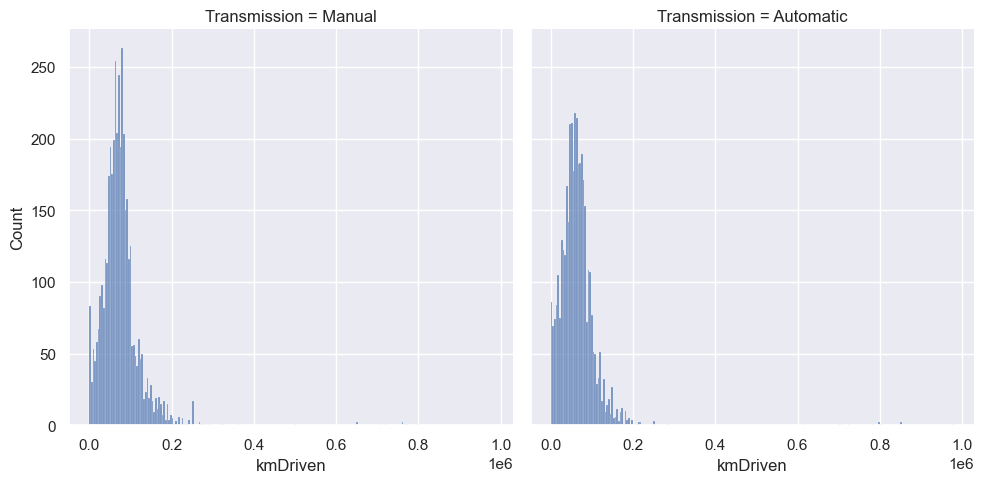

In [34]:
sns.displot(data=top_10_df,x='kmDriven',col='Transmission')

`Similar Distribution Shape:` Both manual and automatic transmissions show a right-skewed distribution, with most vehicles concentrated in the lower kilometer ranges (0-200,000 km). 
- This suggests that regardless of transmission type, most cars in the dataset are either relatively new or have moderate mileage. 

`Higher Peak for Manual Transmission:` The manual transmission graph shows a higher peak count (around 250 vehicles) compared to automatic transmission (around 200 vehicles). 
This could indicate:

- A larger sample size of manual transmission vehicles in the dataset
- Manual transmissions being more common in certain market segments or regions
- Potential data collection biases or market-specific preferences


`Similar Maximum Mileage:`Both transmission types show maximum kilometers driven extending to around 200,000-300,000 km, suggesting that:


- Both transmission types can achieve similar longevity
- There's no significant durability advantage between the two types
- Cars are typically retired or sold before reaching extreme mileages regardless of transmission type


`Concentration in Lower Mileage:` The highest concentration of vehicles for both transmission types is in the 50,000-150,000 km range, which might indicate:


- The dataset mostly contains relatively young to middle-aged vehicles
- Most cars are sold or traded in within this mileage range
- This could be the sweet spot for used car market activity where many transactions occur
___

(0.0, 200000.0)

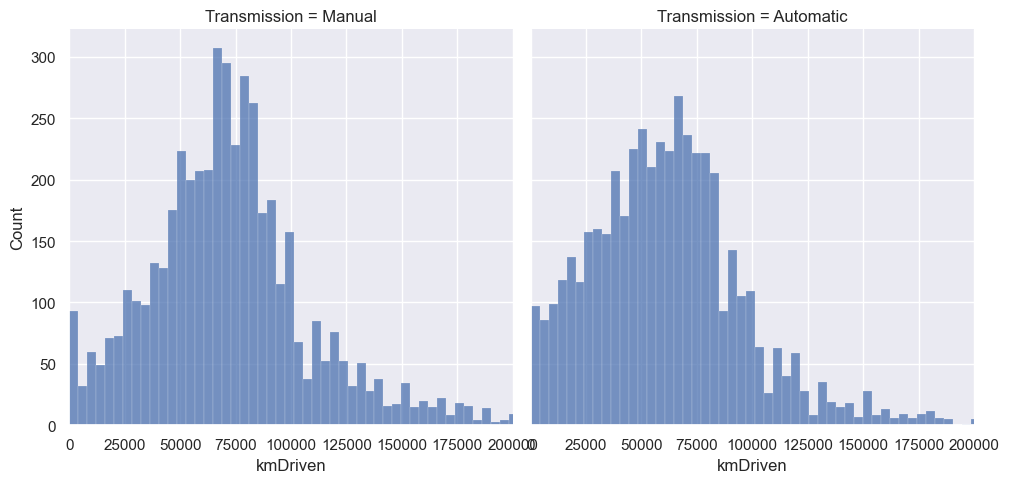

In [35]:
sns.displot(data=df,x='kmDriven',col='Transmission')
plt.xlim(0,200000)

#### Peak Mileage Differences:


- Manual transmission vehicles show peak frequency around 75,000-80,000 km
- Automatic transmission vehicles peak slightly earlier at around 60,000-65,000 km
- This could suggest that manual transmission vehicles tend to be kept longer before being sold


#### Distribution Shape Variations:


- Manual transmission shows a more pronounced peak with steeper rise and fall
- Automatic transmission has a more gradual, flatter distribution
- This might indicate more consistent usage patterns for automatic vehicles


#### Long-tail Characteristics:


- Both types show vehicles reaching 200,000 km
- Manual transmission shows slightly more vehicles in very high mileage ranges (150,000+ km)
- This could suggest better longevity or higher durability of manual transmissions


#### Initial Range (0-25,000 km):


- Automatic transmission shows higher counts in the very low mileage range
- This might indicate a preference for automatic transmissions in newer vehicles
- Could also suggest higher turnover rates for automatic vehicles
___

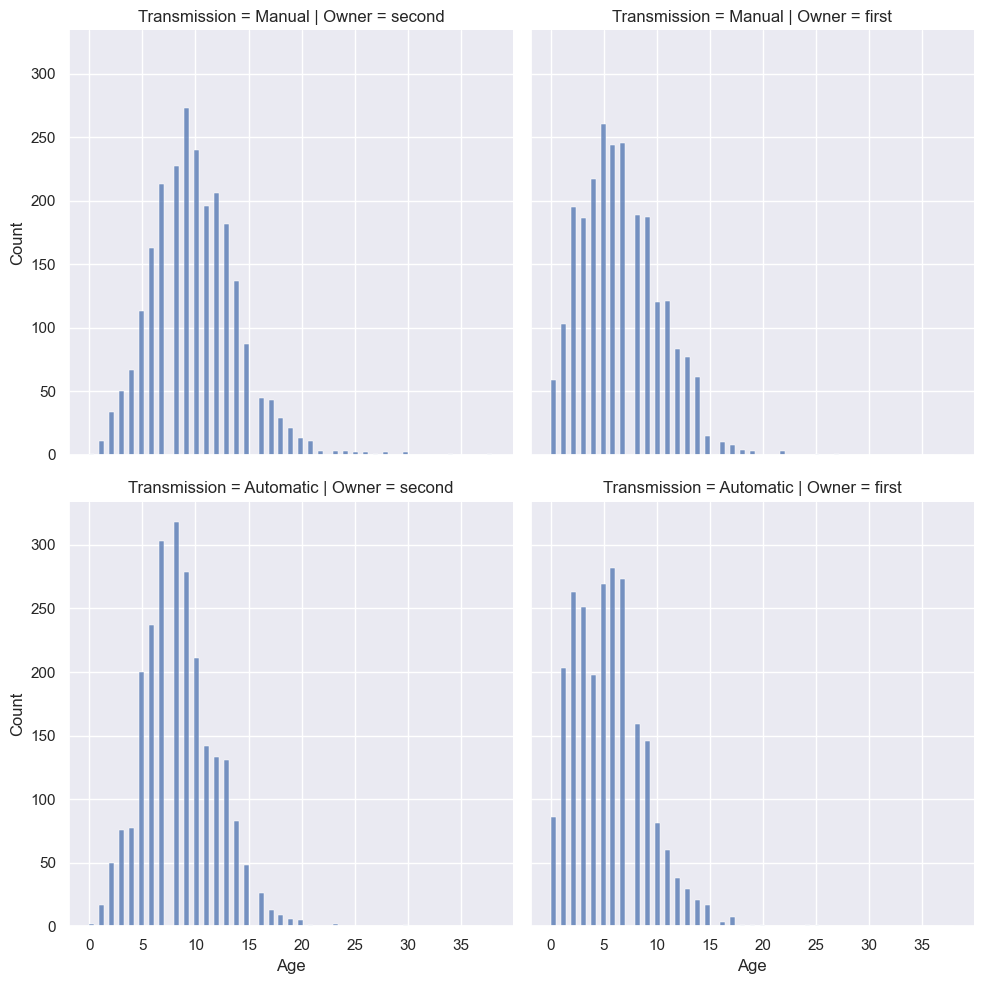

In [36]:
sns.displot(data=df, x='Age',col='Owner',row='Transmission')

#### Age Distribution Patterns:


- Peak age for both transmission types is around 7-10 years
- Second owners tend to have slightly older vehicles than first owners
- This suggests most car ownership transfers happen around 7-10 years of vehicle age


#### First vs Second Owner Differences:


- First owners show a sharper decline after peak age
- Second owners have a more gradual decline in frequency
- Indicates first owners typically sell their vehicles within a specific age window


#### Transmission Type Impact:


- Manual transmission vehicles show similar patterns between first and second owners
- Automatic transmission vehicles show slightly younger age profiles for first owners
- This might reflect changing market preferences towards automatic transmissions in recent years


#### Maximum Age Range:


- Few vehicles older than 20 years in any category
- Second owners have slightly more older vehicles
- This suggests most vehicles are retired or sold again before reaching 20 years of age
___